# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [4]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, filters, io, morphology 
from sklearn.cluster import KMeans



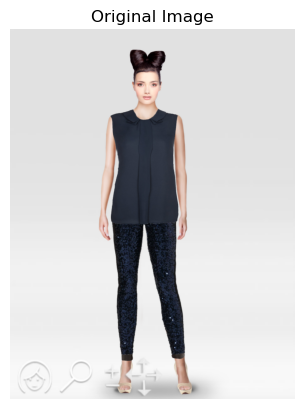

In [15]:
import cv2

# Load an image from file
image = cv2.imread('./images/model.png', 1)

# Convert BGR (OpenCV default) to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow( image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

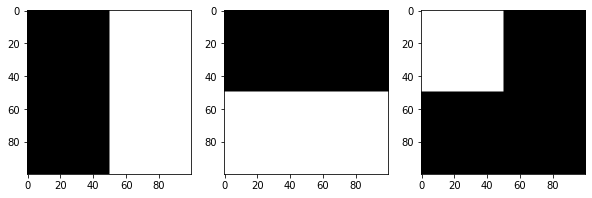

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


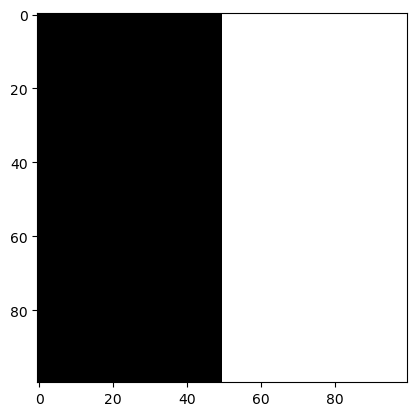

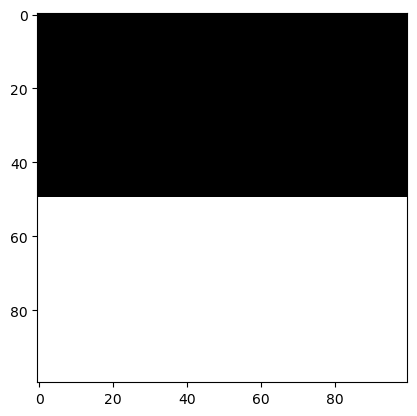

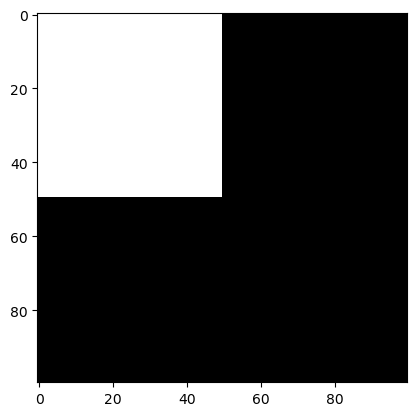

In [28]:
import pandas as pd
from matplotlib import image
from matplotlib import pyplot

# define height and width
height = 100
width = 100
# first create a white Image 100x100
img_1 = np.ones((height, width, 3), dtype=np.uint8) * 255
for i in range(height): # select all the rows (height)
    for j in range(int(width/2)): #select the first half of the columns (width) 
        img_1[i][j] = [0, 0, 0] # make the pixels black


# display the array of pixels as an image
pyplot.imshow(img_1)
pyplot.show()

# first create a white Image 100x100
img_2 = np.ones((height, width, 3), dtype=np.uint8) * 255
for i in range(int(height/2)): #select the first half of the rows (height)
    for j in range(width): # select all the columns (width)
        img_2[i][j] = [0, 0, 0] # make the pixels black


# display the array of pixels as an image
pyplot.imshow(img_2)
pyplot.show()

# first create a Black Image 100x100
img_3 = np.zeros((height, width, 3), dtype=np.uint8)
for i in range(int(height/2)): #select the first half of the rows (height)
    for j in range(int(width/2)): # select all the columns (width)
        img_3[i][j] = [255, 255, 255] # make the pixels black


# display the array of pixels as an image
pyplot.imshow(img_3)
pyplot.show()






*   Use the above three images to create the following image

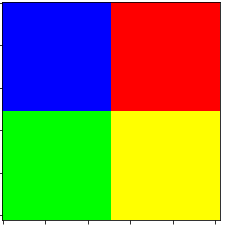
*Hint: Remember channels and color spaces*

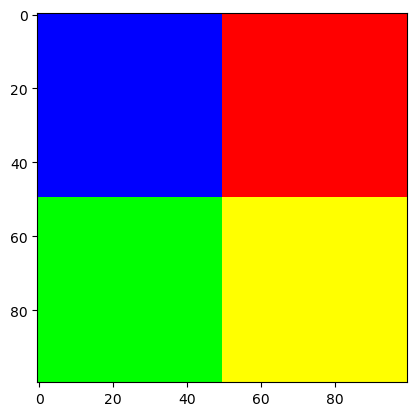

In [35]:
# OpenCV uses BGR as color coding, but numpy uses RGB
# first create a white Image 100x100
img_4 = np.ones((height, width, 3), dtype=np.uint8) * 255
for i in range(height): #select the first half of the rows (height)
    for j in range(width): # select all the columns (width)
        if i in range(0, int(height/2)):
            if j in range(0, int(width/2)):
                img_4[i][j] = [0, 0, 255] # make the pixels blue
            else:
                img_4[i][j] = [255, 0, 0] # make the pixels red
        else:
            if j in range(int(width/2), width+1):
                img_4[i][j] = [255, 255, 0] # make the pixels yellow (red + green?????)
            else:
                img_4[i][j] = [0, 255, 0] # make the pixels green 


# display the array of pixels as an image
pyplot.imshow(img_4)
pyplot.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

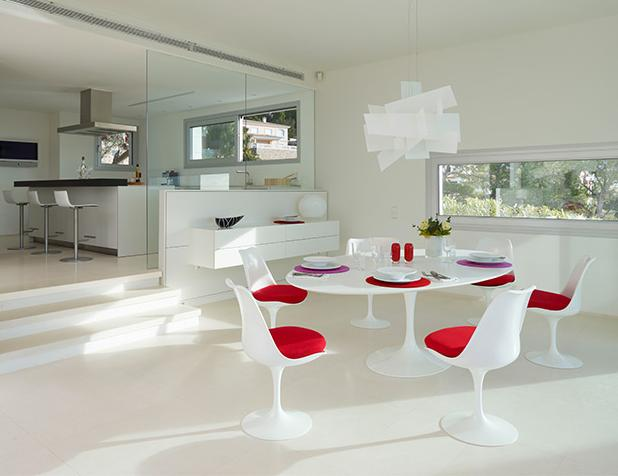

*   Extract individual channels and plot them using matplotlib subplot.



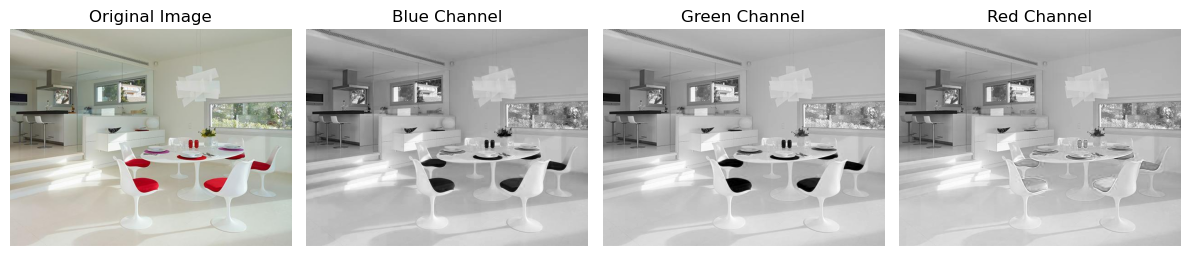

In [40]:


# Load the image
image = cv2.imread('images/sillas.jpg')

# Split the image into its BGR components
B, G, R = cv2.split(image)

# Create a subplot with 1 row and 4 columns (for original and 3 channels)
plt.figure(figsize=(12, 4))

# Display the original image (converted to RGB for matplotlib)
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the Blue channel
plt.subplot(1, 4, 2)
plt.imshow(B, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# Display the Green channel
plt.subplot(1, 4, 3)
plt.imshow(G, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Display the Red channel
plt.subplot(1, 4, 4)
plt.imshow(R, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

In [64]:
# Define red pixel: red > 100 , blue and green < 100 
red_pixels = image[(image[:,:,0] > 100) & (image[:,:,1] < 100) & (image[:,:,2] < 100)]
new_image = image.copy()

new_image[:,:,2] = red_pixels[:,:,0]
new_image[:,:,0] = 0


plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Image with Red replaced by Blue
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title('Red Replaced by Blue')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

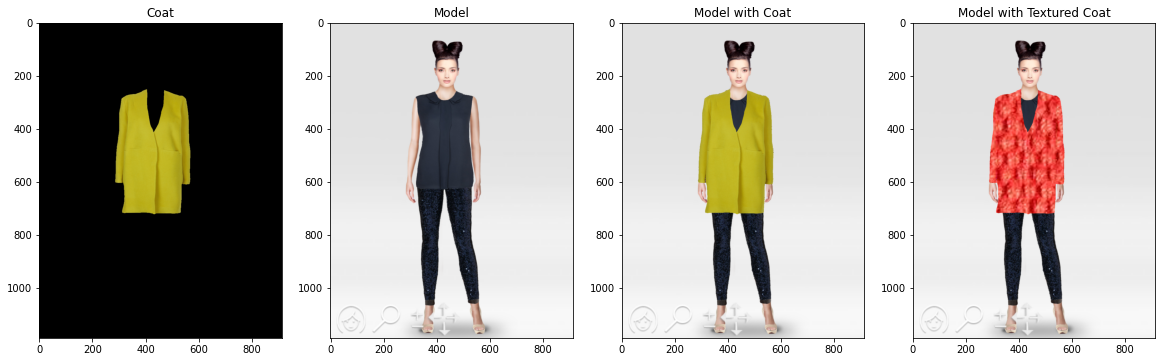

(1188, 915, 3) (1188, 915, 3)


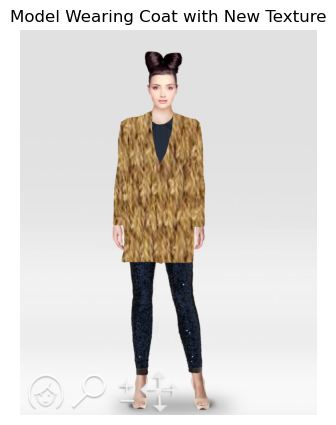

In [80]:
# Load the model and coat images
model_image = cv2.imread('images/model.png')
coat_image = cv2.imread('images/coat.png')
texture_image = cv2.imread('images/texture.png') 

print(model_image.shape, coat_image.shape)


# Place the coat on the model by overlaying the coat on the model
x_offset = 0
y_offset = 0
model_with_coat = model_image.copy()


#resize the texture image
texture_resize = cv2.resize(texture_image, (coat_image.shape[1], coat_image.shape[0]))

# Create a mask of the coat (assuming the coat image has a transparent background or a solid color)
# Convert the coat image to grayscale and threshold it to create a binary mask
gray_coat = cv2.cvtColor(coat_image, cv2.COLOR_BGR2GRAY)
_, coat_mask = cv2.threshold(gray_coat, 1, 255, cv2.THRESH_BINARY)


# Invert the mask for background extraction
coat_mask_inv = cv2.bitwise_not(coat_mask)

# Use the mask to extract the coat region from the model
model_bg = cv2.bitwise_and(model_image, model_image, mask=coat_mask_inv)

# Apply the texture to the coat area using the mask
coat_fg = cv2.bitwise_and(texture_resize, texture_resize, mask=coat_mask)

# Combine the textured coat with the background
final_coat = cv2.add(model_bg, coat_fg)

# Place the final textured coat on the model image
model_with_coat[y_offset:y_offset+coat_image.shape[0], x_offset:x_offset+coat_image.shape[1]] = final_coat

# Display the final image with the model wearing the coat with the new texture
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(model_with_coat, cv2.COLOR_BGR2RGB))
plt.title('Model Wearing Coat with New Texture')
plt.axis('off')
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




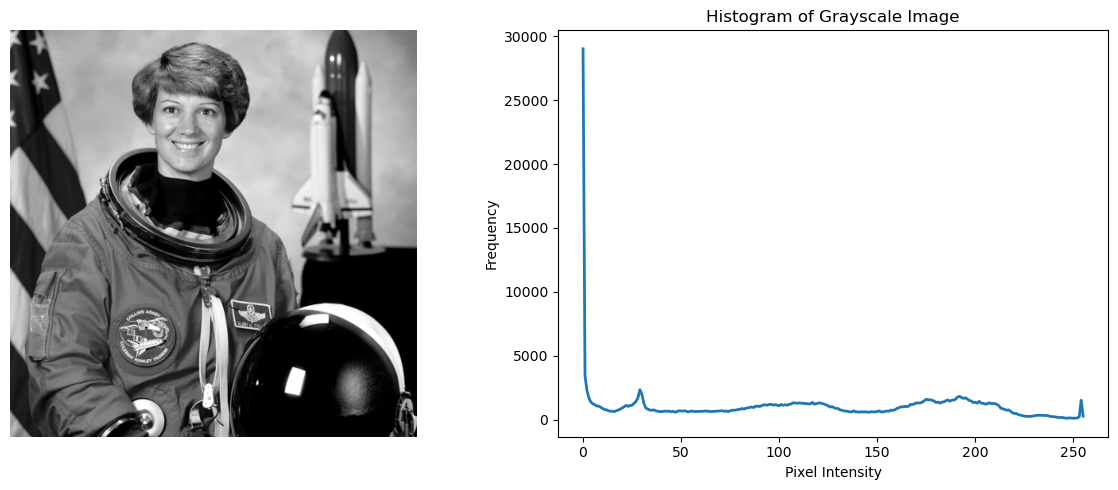

In [161]:
astronaut = data.astronaut()
original = data.moon()
astronaut_gray = cv2.cvtColor(astronaut, cv2.COLOR_BGR2GRAY)

# Step 10: Compute the histogram of the grayscale image
hist, bins = exposure.histogram(astronaut_gray)

# Step 11: Display the final grayscale image and its histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Display the grayscale image
ax[0].imshow(astronaut_gray, cmap='gray')
ax[0].axis('off')

# Display the histogram
ax[1].plot(bins, hist, lw=2)
ax[1].set_title('Histogram of Grayscale Image')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

(256,) (256,)


ValueError: x and y must have same first dimension, but have shapes (1,) and (256,)

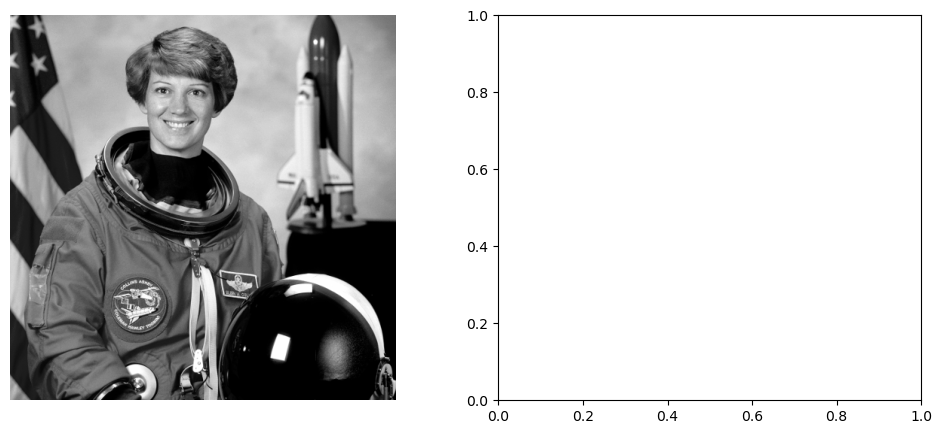

In [162]:
# Step 11: Display the final grayscale image and its histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
print(bins.shape, hist.shape)
# Display the grayscale image
ax[0].imshow(astronaut_gray, cmap='gray')
ax[0].axis('off')

# Display the histogram
ax[1].plot(0, hist, color='black')
ax[1].set_title('Histogram of Grayscale Image')
ax[1].set_xlim(0, 255)
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

the size of the matrix is different and it returns and error. the correct bin count must be the same and the hist value
...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


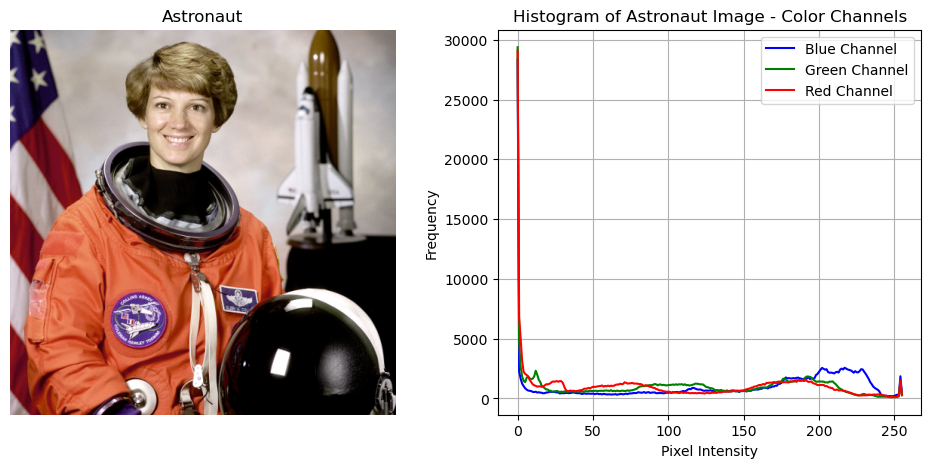

In [120]:
# Split the image into its Blue, Green, and Red channels
b_channel, g_channel, r_channel = cv2.split(astronaut)


# Compute the histogram for each channel
b_hist = cv2.calcHist([b_channel], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
r_hist = cv2.calcHist([r_channel], [0], None, [256], [0, 256])

# Plot the histograms for each channel
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Display the astronaut
ax[0].imshow(astronaut, cmap='gray')
ax[0].set_title('Astronaut')
ax[0].axis('off')
ax[1].plot(b_hist, color='blue', label='Blue Channel')
ax[1].plot(g_hist, color='green', label='Green Channel')
ax[1].plot(r_hist, color='red', label='Red Channel')
ax[1].set_title('Histogram of Astronaut Image - Color Channels')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')
ax[1].legend()
ax[1].grid()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



c:\Users\danis\anaconda3\Lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


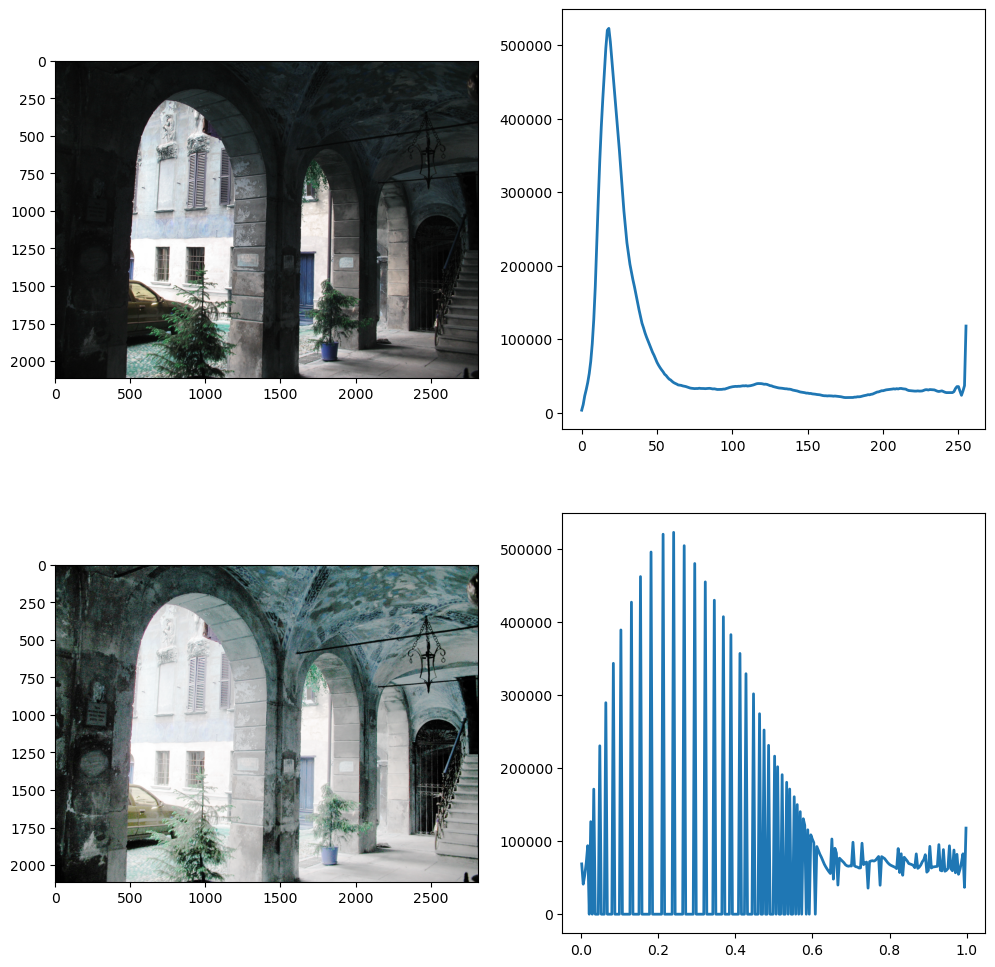

In [132]:
aqua_img = cv2.imread('images/aquatermi_lowcontrast.jpg')
# Step 10: Compute the histogram of the grayscale image
aqua_img_gray = cv2.cvtColor(aqua_img, cv2.COLOR_BGR2GRAY)
hist, bins = exposure.histogram(aqua_img)
aqua_equalized = exposure.equalize_hist(aqua_img)
hist_enhanced, bins_enhanced = exposure.histogram(aqua_equalized)

# Step 4: Plot the histograms for each channel
plt.subplots(2, 2, figsize=(12, 12))
# Display the image
plt.subplot(2,2,1)
plt.imshow(aqua_img, cmap='gray')
# Display the original histogram
plt.subplot(2,2,2)
plt.plot(bins, hist, lw=2)
#Display the enhanced image
plt.subplot(2,2,3)
plt.imshow(aqua_equalized, cmap='gray')
# Display the original histogram
plt.subplot(2,2,4)
plt.plot(bins_enhanced, hist_enhanced, lw=2)



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

 histogram equalization is more effective for low-contrast images where the intensity distribution is limited, while linear contrast stretching is simpler and is used when the intensity range is not fully utilized but the overall distribution is reasonable.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



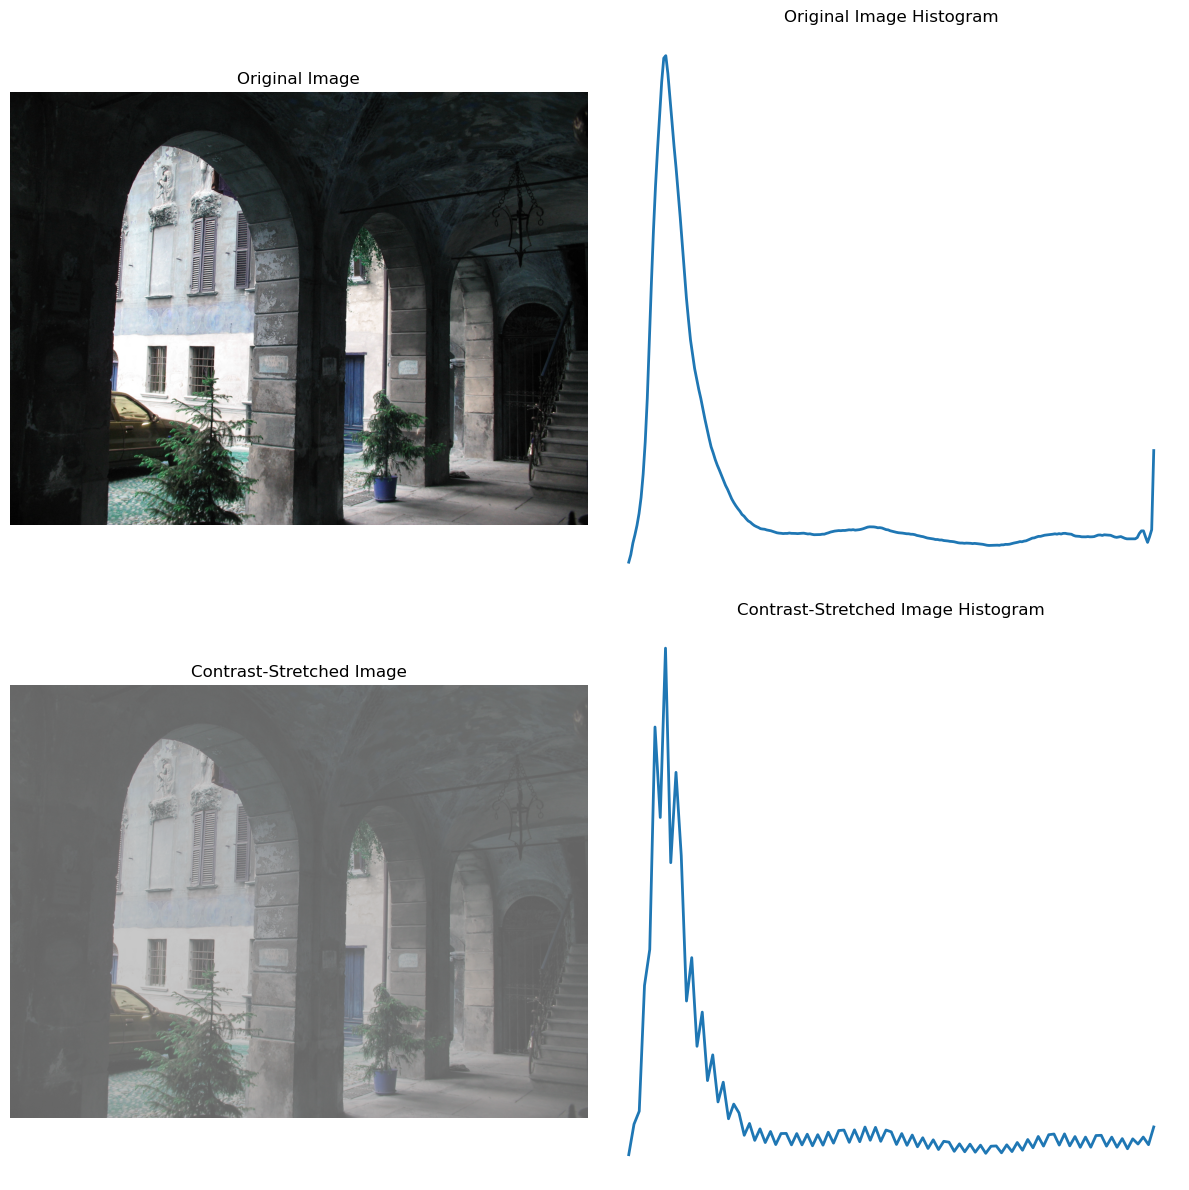

In [145]:
# Step 1: Read the astronaut image
aqua_img = cv2.imread('images/aquatermi_lowcontrast.jpg')  # Adjust the path if necessary
aqua_img_gray = cv2.cvtColor(aqua_img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Step 2: Find the minimum and maximum pixel values
min_val = np.min(aqua_img)
max_val = np.max(aqua_img)

# Step 3: Apply Linear Contrast Stretching
# Define the desired output range
new_min = 100
new_max = 200

# Apply the linear contrast stretching formula
contrast_stretched_image = ((aqua_img - min_val) / (max_val - min_val)) * (new_max - new_min) + new_min
contrast_stretched_image = contrast_stretched_image.astype(np.uint8)  # Convert back to uint8

# Calculate the histograms for the original and the enhanced imaged
hist, bins = exposure.histogram(aqua_img)
hist_stretched, bins_stretched = exposure.histogram(contrast_stretched_image)

# Step 4: Display the original and contrast-stretched images
plt.subplots(2, 2, figsize=(12, 12))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(aqua_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Original image Histogram
plt.subplot(2, 2, 2)
plt.plot(bins, hist, lw=2)
plt.title('Original Image Histogram')
plt.axis('off')

# Contrast-stretched image
plt.subplot(2, 2, 3)
plt.imshow(contrast_stretched_image, cmap='gray')
plt.title('Contrast-Stretched Image')
plt.axis('off')

# Contrast_stretched image Histogram
plt.subplot(2, 2, 4)
plt.plot(bins_stretched, hist_stretched, lw=2)
plt.title('Contrast-Stretched Image Histogram')
plt.axis('off')

plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




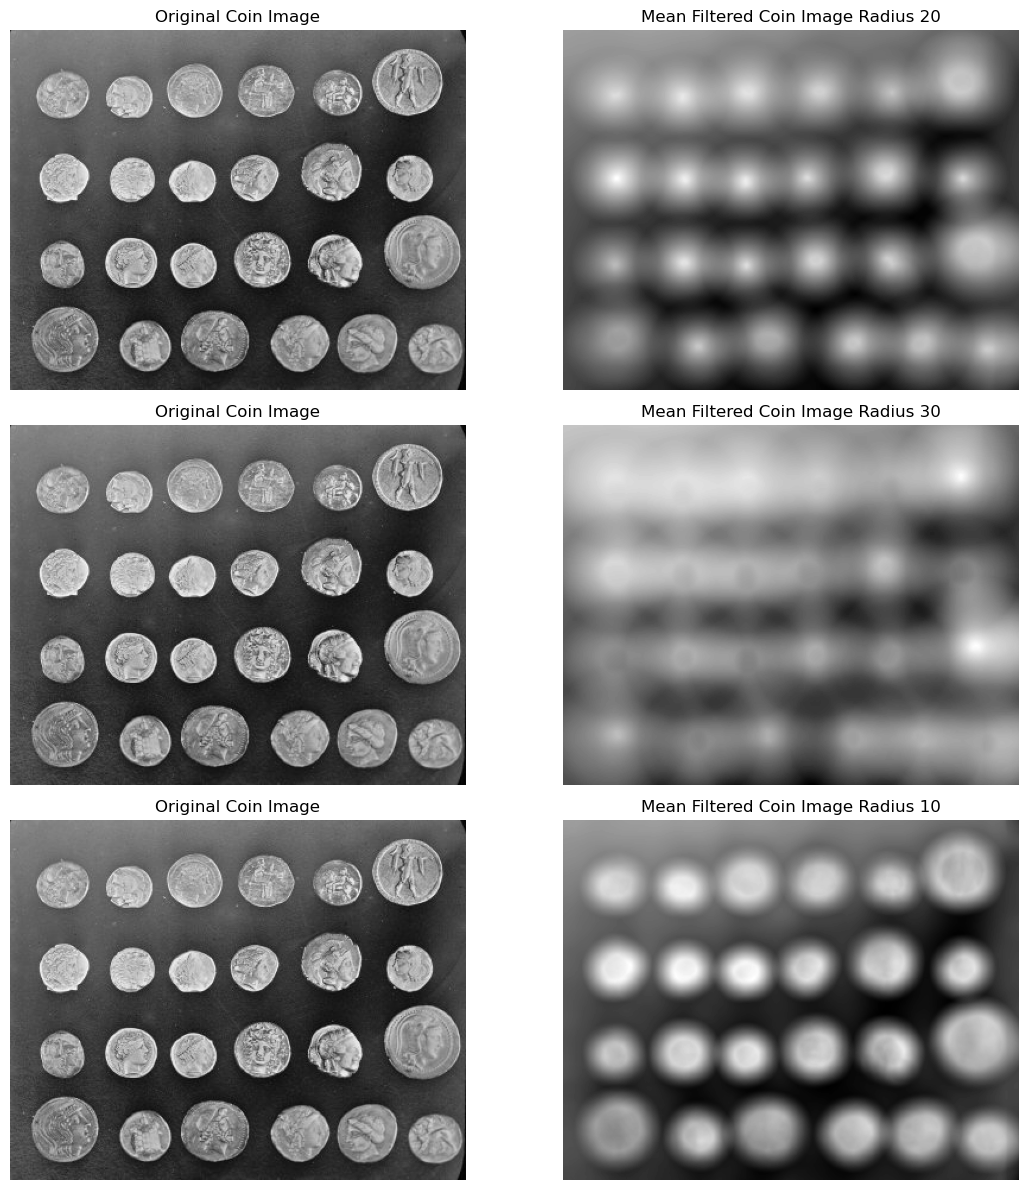

In [157]:
coin = data.coins() 
# Step 1: Define the radius
radius_20 = 20
radius_30 = 30
radius_10 = 10

# Step 2: Create a disk structuring element
selem_20 = morphology.disk(radius_20)
selem_30 = morphology.disk(radius_30)
selem_10 = morphology.disk(radius_10)

# The mean filter requires the input image to be in uint8 format
filtered_image_20 = filters.rank.mean(coin, selem_20)
filtered_image_30 = filters.rank.mean(coin, selem_30)
filtered_image_10 = filters.rank.mean(coin, selem_10)

# Step 4: Display the original and filtered images
plt.subplots(3, 2, figsize=(12,12))

# Original image
plt.subplot(3, 2, 1)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 2)
plt.imshow(filtered_image_20, cmap='gray')
plt.title('Mean Filtered Coin Image Radius 20')
plt.axis('off')

# Original image
plt.subplot(3, 2, 3)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 4)
plt.imshow(filtered_image_30, cmap='gray')
plt.title('Mean Filtered Coin Image Radius 30')
plt.axis('off')# Original image
plt.subplot(3, 2, 5)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 6)
plt.imshow(filtered_image_10, cmap='gray')
plt.title('Mean Filtered Coin Image Radius 10')
plt.axis('off')

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

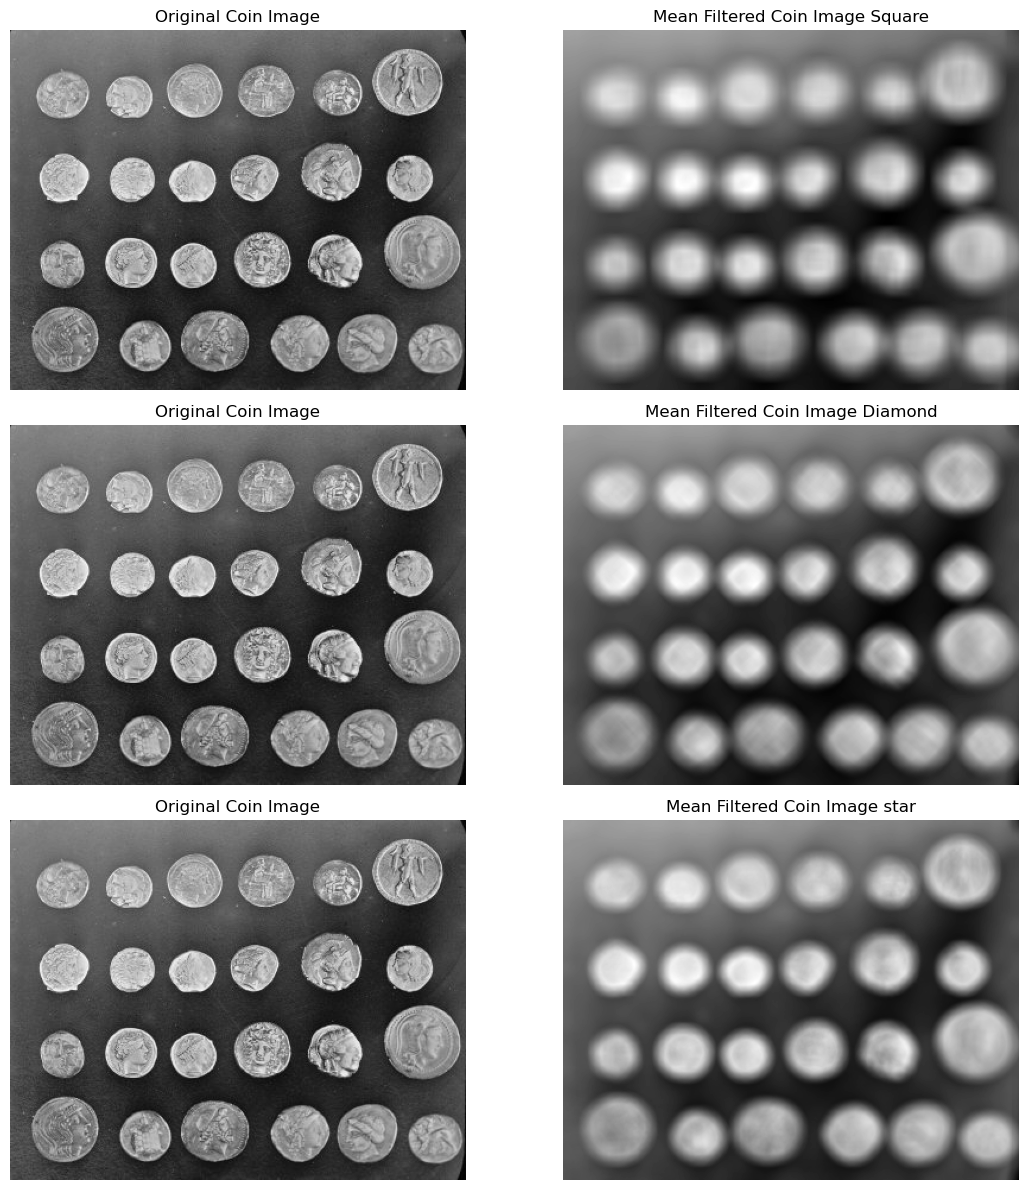

In [160]:
# Step 1: Define the radius
radius_20 = 20
radius_30 = 30
radius_10 = 10

# Step 2: Create a disk structuring element
selem_square = morphology.square(width=20)
selem_diamond = morphology.diamond(radius=10)
selem_star = morphology.star(a=5)

# The mean filter requires the input image to be in uint8 format
filtered_image_square = filters.rank.mean(coin, selem_square)
filtered_image_diamond = filters.rank.mean(coin, selem_diamond)
filtered_image_star = filters.rank.mean(coin, selem_star)

# Step 4: Display the original and filtered images
plt.subplots(3, 2, figsize=(12,12))

# Original image
plt.subplot(3, 2, 1)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 2)
plt.imshow(filtered_image_square, cmap='gray')
plt.title('Mean Filtered Coin Image Square')
plt.axis('off')

# Original image
plt.subplot(3, 2, 3)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 4)
plt.imshow(filtered_image_diamond, cmap='gray')
plt.title('Mean Filtered Coin Image Diamond')
plt.axis('off')
# Original image
plt.subplot(3, 2, 5)
plt.imshow(coin, cmap='gray')
plt.title('Original Coin Image')
plt.axis('off')

# Filtered image
plt.subplot(3, 2, 6)
plt.imshow(filtered_image_star, cmap='gray')
plt.title('Mean Filtered Coin Image star')
plt.axis('off')


plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

the edges are the most prominent change by using different filters
...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

seem to start at the center of each element
...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

For simple applications with uniform noise, a mean filter may suffice. For applications requiring edge preservation and more sophisticated noise reduction, the Gaussian filter is generally the better choice.
...